<a href="https://colab.research.google.com/github/Anlu-Chen/CNN_thermographs/blob/main/Termograf%C3%ADas_1D_CNN(Modelo%206).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import time as time
from tensorflow.keras.callbacks import LearningRateScheduler
import math
import pandas as pd
import matplotlib.pyplot as plt
import random as rand

In [ ]:
#modificar esto al lugar donde se tenga la base de datos
train_experiments=np.loadtxt('/content/drive/MyDrive/Termografias_1D/train_experiments_termografias_7.1.csv', delimiter=';')
train_solutions=np.loadtxt('/content/drive/MyDrive/Termografias_1D/train_solutions_termografias_7.1.csv',delimiter=';')
test_experiments=np.loadtxt('/content/drive/MyDrive/Termografias_1D/test_experiments_termografias_7.1.csv',delimiter=';')
test_solutions=np.loadtxt('/content/drive/MyDrive/Termografias_1D/test_solutions_termografias_7.1.csv',delimiter=';')
validation_experiments=np.loadtxt('/content/drive/MyDrive/Termografias_1D/validation_experiments_termografias_7.1.csv',delimiter=';')
validation_solutions=np.loadtxt('/content/drive/MyDrive/Termografias_1D/validation_solutions_termografias_7.1.csv',delimiter=';')
print(
    train_experiments.shape,
    train_solutions.shape,
    test_experiments.shape,
    test_solutions.shape,
    validation_experiments.shape,
    validation_solutions.shape,)

(84000, 1001) (5600,) (12600, 1001) (840,) (8400, 1001) (560,)


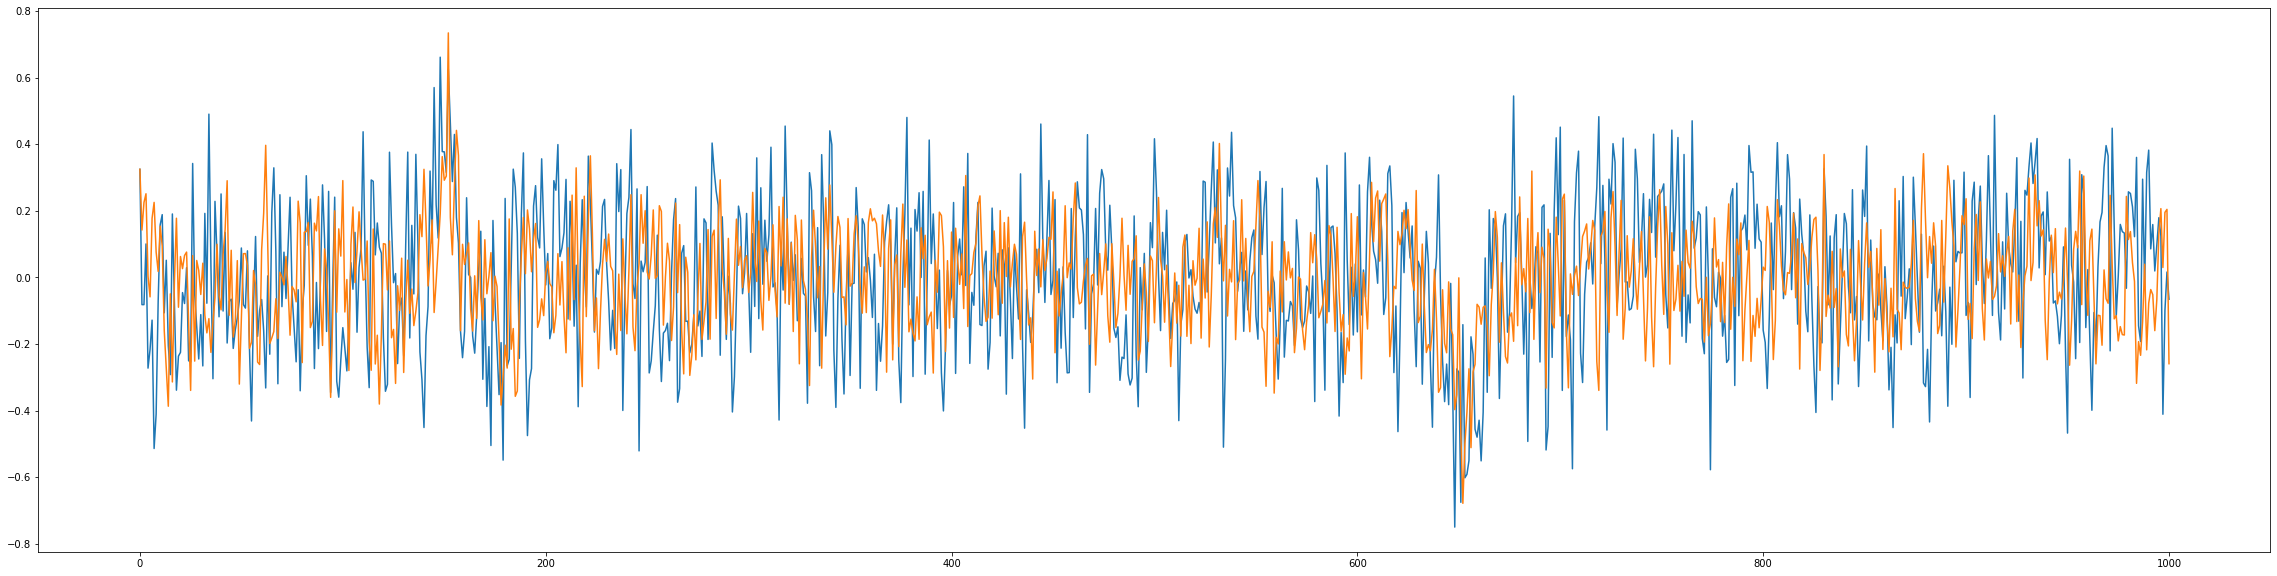

In [ ]:
x=np.zeros(1001)
y=np.zeros(1001)
z=np.zeros(1001)
for i in range (0,1001):
  x[i]=i
y=train_experiments[0]
z=train_experiments[1]
fig, ax = plt.subplots(figsize = (40, 10))
plt.plot(x,y)
plt.plot(x,z)
plt.show()
#vemos que los valores estan entre -1 y 1, por eso hay que normalizar y volverlas positivas.

In [ ]:
train_experiments_new=(train_experiments+1)/2
test_experiments_new=(test_experiments+1)/2
validation_experiments_new=(validation_experiments+1)/2

print(
train_experiments_new,
test_experiments_new,
validation_experiments_new)

[[0.6625     0.45923568 0.45921391 ... 0.45060555 0.50818002 0.46738172]
 [0.6625     0.57127077 0.61258471 ... 0.59778374 0.6023118  0.3705379 ]
 [0.6625     0.56118906 0.61550854 ... 0.47336753 0.56370709 0.51165726]
 ...
 [0.63125    0.5544496  0.51673371 ... 0.47444976 0.50942939 0.49017943]
 [0.63125    0.47635518 0.52710338 ... 0.48964566 0.44855693 0.45439227]
 [0.63125    0.42123335 0.45720775 ... 0.47264906 0.50407442 0.51015458]] [[0.64375    0.42824863 0.35664836 ... 0.47257592 0.35427245 0.41381588]
 [0.64375    0.65428397 0.7325934  ... 0.60282636 0.67944821 0.48477553]
 [0.64375    0.46154106 0.45187328 ... 0.54081029 0.53250389 0.529048  ]
 ...
 [0.63125    0.63037557 0.54847329 ... 0.47720643 0.61657229 0.61887671]
 [0.63125    0.56966972 0.47009497 ... 0.57692853 0.67891954 0.62462251]
 [0.63125    0.48290725 0.49529686 ... 0.3427941  0.63692617 0.43483272]] [[0.66875    0.44858895 0.45878083 ... 0.51404271 0.47082769 0.56075031]
 [0.66875    0.45811208 0.50459303 ... 

In [ ]:
# Al recolocar al ser los experimentos 15 veces mas, tenemos que dar la forma 
# a las soluciones correspondientes y como corresponden a la misma
# solucion cada 15 set de datos, realizamos el siguiente codigo.
train_solutions_new=np.zeros(5600*15)
for i in range(0,5600):
  for j in range(0,15):
    train_solutions_new[i*15+j]=train_solutions[i]

test_solutions_new=np.zeros(840*15)
for i in range(0,840):
  for j in range(0,15):
    test_solutions_new[i*15+j]=test_solutions[i]

validation_solutions_new=np.zeros(560*15)
for i in range(0,560):
  for j in range(0,15):
    validation_solutions_new[i*15+j]=validation_solutions[i]

print(train_solutions_new,
      test_solutions_new,
      validation_solutions_new)

[0.589574 0.589574 0.589574 ... 0.210653 0.210653 0.210653] [0.64409 0.64409 0.64409 ... 0.53611 0.53611 0.53611] [0.196334 0.196334 0.196334 ... 0.604618 0.604618 0.604618]


In [ ]:
print(
    train_experiments_new.shape,
    train_solutions_new.shape,
    test_experiments_new.shape,
    test_solutions_new.shape,
    validation_experiments_new.shape,
    validation_solutions_new.shape,)

(84000, 1001) (84000,) (12600, 1001) (12600,) (8400, 1001) (8400,)


In [ ]:
#reordenamos los datos de entrenamiento
print(train_experiments_new.shape)
train_experiments_new=np.reshape(train_experiments_new,(train_experiments_new.shape[0],1001,1))  
#el 1 al final es necesario para indicar a la CNN que nuestro modelo es plano, (1D o 2D).
print(train_experiments_new.shape)

print(test_experiments_new.shape)
test_experiments_new=np.reshape(test_experiments_new,(test_experiments_new.shape[0],1001,1))
print(test_experiments_new.shape)

print(validation_experiments_new.shape)
validation_experiments_new=np.reshape(validation_experiments_new,(validation_experiments_new.shape[0],1001,1))
print(validation_experiments_new.shape)

(84000, 1001)
(84000, 1001, 1)
(12600, 1001)
(12600, 1001, 1)
(8400, 1001)
(8400, 1001, 1)


In [ ]:
#Eiminamos el los datos anteriores ya cargados para no ocupar memoria.
del (train_experiments,
    train_solutions,
    test_experiments,
    test_solutions,
    validation_experiments,
    validation_solutions)

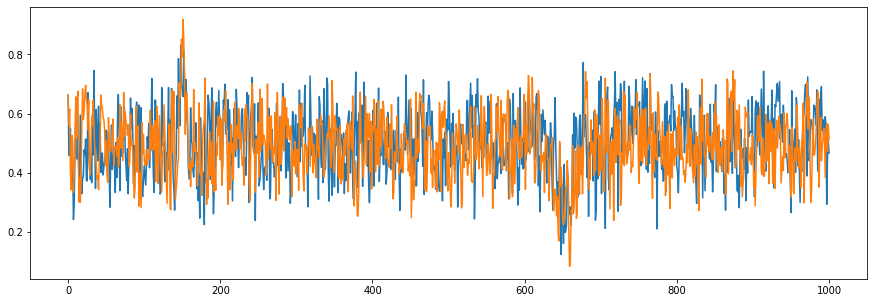

In [ ]:
x=np.zeros(1001)
y=np.zeros(1001)
z=np.zeros(1001)
for i in range (0,1001):
  x[i]=i
y=train_experiments_new[0]
z=train_experiments_new[2]
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot(x,y)
plt.plot(x,z)
plt.show()
#vemos como se muestran las termografias con el mismo defecto pero diferente ruido
#en un rango de valores positivos adimensionalizados [0,1]

In [ ]:
#Mezclamos todo
total_experiments = np.vstack((train_experiments_new, test_experiments_new, validation_experiments_new))
total_solutions = np.concatenate((train_solutions_new, test_solutions_new, validation_solutions_new))
print(total_experiments.shape,
      total_solutions.shape)

(105000, 1001, 1) (105000,)


In [ ]:
#Eiminamos el los datos anteriores ya cargados para no ocupar memoria.
del (train_experiments_new,
    train_solutions_new,
    test_experiments_new,
    test_solutions_new,
    validation_experiments_new,
    validation_solutions_new)

In [ ]:
numeros = list(range(0,105000))
rand.shuffle(numeros)
print(numeros)
print(type(numeros))
print(len(numeros)-len(set(numeros)))  #para comprobar si se ha repetido algun numero, si sale 0, no se ha repetido
numeros_random = np.array(numeros) #pasar  la lista a vector
#print(numeros_random)

In [ ]:
train_experiments_final = total_experiments[numeros_random[0:80000],:]
test_experiments_final = total_experiments[numeros_random[80000:100000],:]
validation_experiments_final = total_experiments[numeros_random[100000:105000],:]

train_solutions_final = total_solutions[numeros_random[0:80000]]
test_solutions_final = total_solutions[numeros_random[80000:100000]]
validation_solutions_final = total_solutions[numeros_random[100000:105000]]

print(train_experiments_final.shape,
      test_experiments_final.shape,
      validation_experiments_final.shape,
      train_solutions_final.shape,
      test_solutions_final.shape,
      validation_solutions_final.shape)

(80000, 1001, 1) (20000, 1001, 1) (5000, 1001, 1) (80000,) (20000,) (5000,)


Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.5.
1600/1600 [==============================] - 70s 39ms/step - loss: 0.0074 - mae: 0.0646 - val_loss: 0.0043 - val_mae: 0.0492
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.45241870901797976.
1600/1600 [==============================] - 65s 40ms/step - loss: 0.0046 - mae: 0.0521 - val_loss: 0.0043 - val_mae: 0.0483
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.4093653765389909.
1600/1600 [==============================] - 64s 40ms/step - loss: 0.0038 - mae: 0.0473 - val_loss: 0.0040 - val_mae: 0.0477
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.37040911034085894.
1600/1600 [==============================] - 64s 40ms/step - loss: 0.0033 - mae: 0.0436 - val_loss: 0.0035 - val_mae: 0.0428
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.33516002301781966.
1600/1600 [==============================] - 64

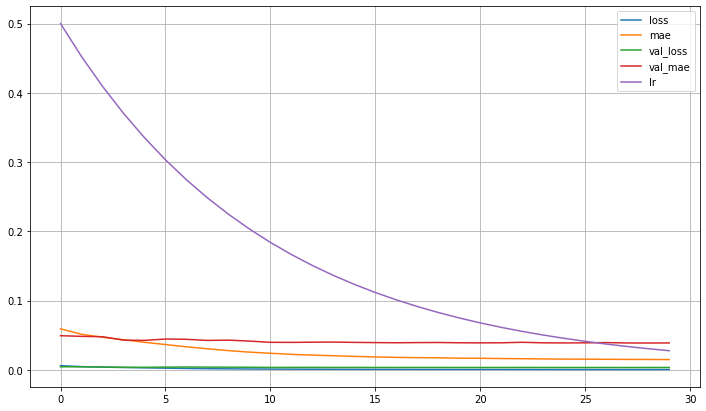

32.319085085392 
 minutos ha durado


In [ ]:
# Entrenamiento de red CNN.
tic=time.time()

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64,kernel_size=(3), input_shape=(train_experiments_final[0].shape)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        #tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64,kernel_size=(3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        #tf.keras.layers.MaxPooling1D(2),
        #tf.keras.layers.Conv1D(128,2),
        #tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Activation('elu'),
        #tf.keras.layers.MaxPooling1D(10),
        tf.keras.layers.Flatten(),
        #Fully-connected:
        tf.keras.layers.Dense(2048,kernel_initializer='random_normal',bias_initializer='zeros', use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1024, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(512, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(256, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(64, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(32, use_bias=True),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1, use_bias=True),
        tf.keras.layers.Activation('sigmoid')
])
############################################################################
# Compilamos el modelo
opt=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True, name='SGD')
model.compile(
    optimizer=opt,
    loss='mse',
    metrics=['mae']) 

# Definimos como va a ser el ratio de aprendizaje exponencial.
initial_learning_rate = 0.5
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Ajustamos el modelo.
history = model.fit(
    train_experiments_final, 
    train_solutions_final, 
    epochs=30, 
    validation_data=(test_experiments_final, test_solutions_final),
    batch_size=50,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
)
############################################################################
# Pintamos el modelo
model.summary() 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12,7))
plt.grid(True)
plt.show()

toc=time.time()
print((toc-tic)/60,'\n minutos ha durado')

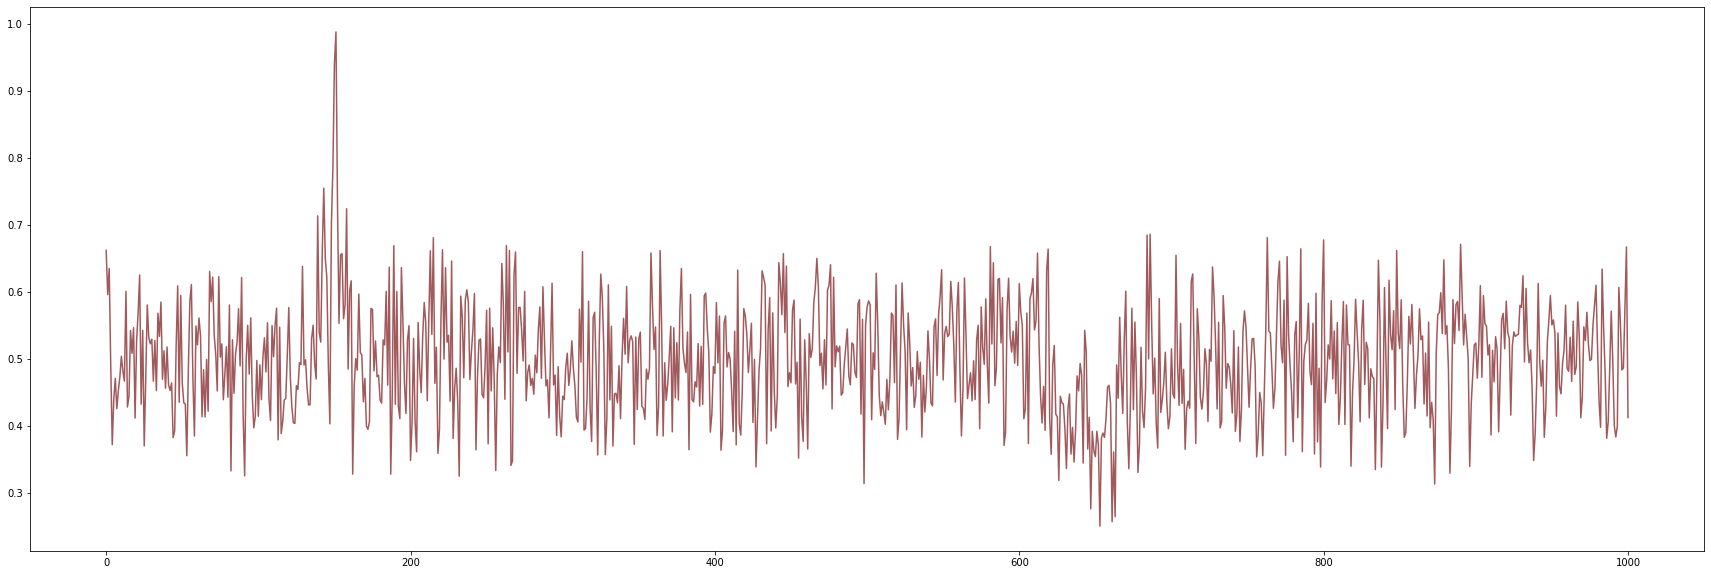

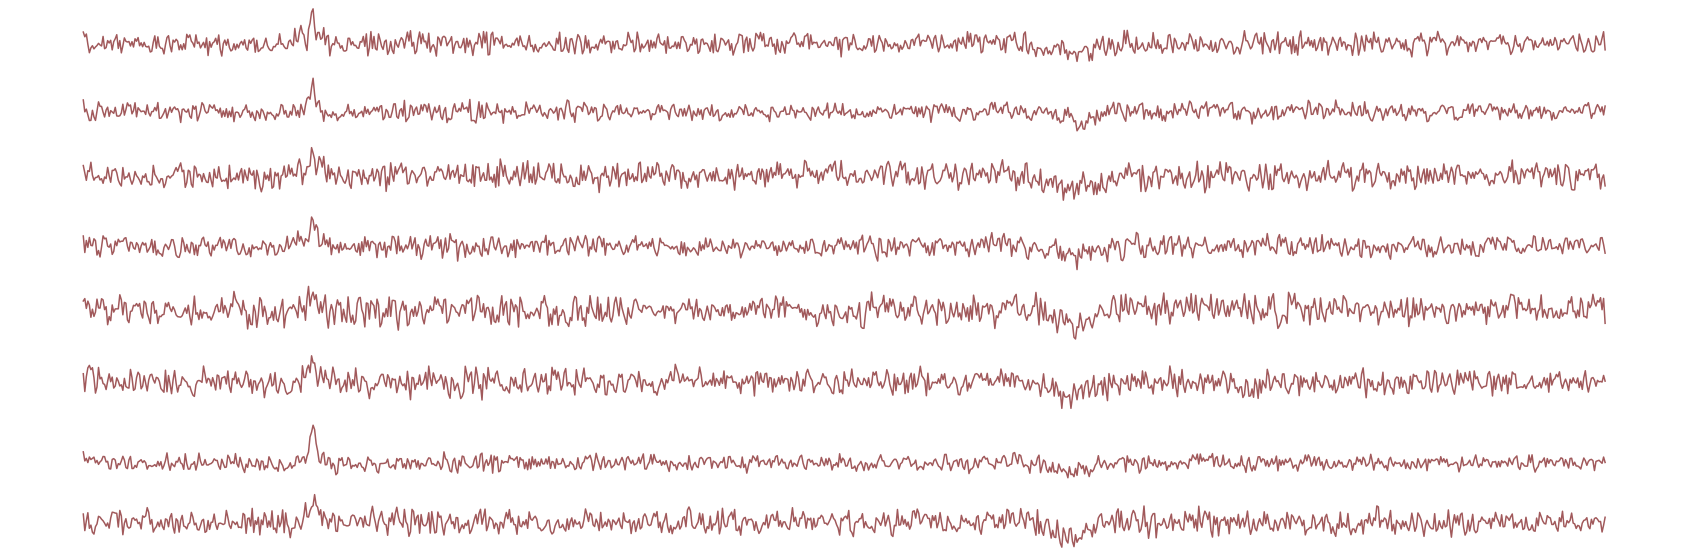

In [ ]:
plt.subplots(figsize = (30, 10))
plt.plot(np.asarray(train_experiments_final[0]), color='#a1595b')
plt.show()


plt.subplots(figsize = (30,10 ))
for i in range (0,8):
    plt.subplot(8,1,i+1)
    plt.plot(train_experiments_final[i*13], color='#a1595b')
    plt.axis('off')
plt.show()  

In [ ]:
s = np.argsort(validation_solutions_final)
print(s)
validation_solutions_final_ordenado = np.sort(validation_solutions_final)
print(np.argsort(validation_solutions_final_ordenado))

validation_experiments_final_ordenado = validation_experiments_final[validation_solutions_final.argsort()]
print(validation_experiments_final_ordenado.shape)


[1424 3232  739 ... 3423 1233  889]
[   0   25   24 ... 4998 4988 4999]
(5000, 1001, 1)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


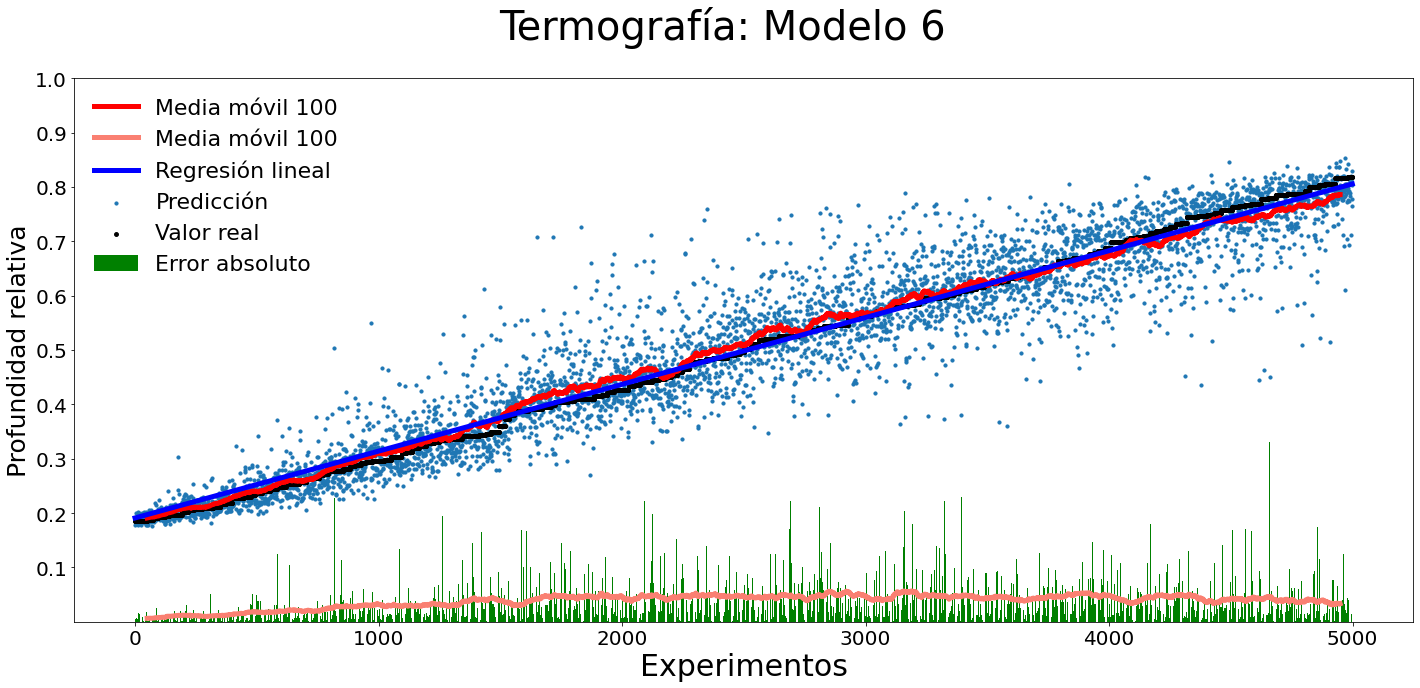

In [ ]:
#media movil
def sma(data, period):   #subfuncion para obtener el sma
    sma1=np.zeros(data.size-50)
    for step in range(len(sma1)):
        sma1[step]=np.mean(data[step-50:step+50])
    return sma1
periodo = 100

# Comparamos las predicciones con las originales
from sklearn.linear_model import LinearRegression
predictions = model.predict(validation_experiments_final_ordenado)
x=np.zeros(5000)
y=np.zeros(5000)
z=np.zeros(5000)
for k in range (1):
    for i in range (0,5000):
      x[i]=i
    for i in range (0,5000):
      y[i]=predictions[i]
    for i in range (0,5000):
      z[i]=validation_solutions_final_ordenado[i]
    sma_y = sma((y),periodo)
    sma_error = sma(abs(y-z),periodo)
    regr = LinearRegression()
    regr1 = LinearRegression()
    xr = x[:, np.newaxis]
    regr.fit(xr,y)
    regr1.fit(xr,abs(y-z))
    fig, ax = plt.subplots(1,figsize = (24,10))
    fig.suptitle("Termografía: Modelo 6", fontsize=40)
    ax.plot(sma_y, color = 'red', linewidth=5, label="Media móvil 100")
    ax.plot(sma_error, color = 'salmon', linewidth=5, label="Media móvil 100")
    ax.plot(xr,regr.predict(xr), color = 'blue', linewidth=5, label="Regresión lineal")
    #ax.plot(xr,regr1.predict(xr), color = 'cyan', linewidth=5, label="Regresión lineal")
    plt.scatter(x,y,label="Predicción",s=10)
    plt.scatter(x,z,label="Valor real",s=15, color="black")
    plt.bar(x,abs(y-z), label="Error absoluto", color="green")
    ax.legend(loc="upper left", frameon=False, fontsize=22 )
    plt.xlabel("Experimentos",fontsize=30)
    plt.ylabel("Profundidad relativa", fontsize=25)
    plt.xticks(size="20")
    plt.yticks((0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1),size="20")
    plt.show()